# Initialization

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'


import scqubits as qubit
import scqubits.utils.plotting as plot

import numpy as np

# Fluxonium qubit

$H_\text{fl}=-4E_\text{C}\partial_\phi^2-E_\text{J}\cos(\phi-\varphi_\text{ext}) +\frac{1}{2}E_L\phi^2$

In [2]:
fluxonium = qubit.Fluxonium(
    EJ=4.61,
    EC=1.361,
    EL=0.33,
    cutoff = 110,
    flux = 0.,
    dC = 0,
    kbt = 40
)

Spectral data:   0%|          | 0/100 [00:00<?, ?it/s]

(<Figure size 900x600 with 1 Axes>,
 <AxesSubplot:xlabel='flux', ylabel='energy [GHz]'>)

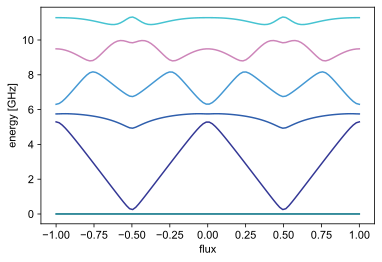

In [3]:
fluxonium.plot_evals_vs_paramvals('flux', np.linspace(-1,1,100), subtract_ground=True)

(<Figure size 900x600 with 1 Axes>,
 <AxesSubplot:xlabel='$\\varphi$', ylabel='Re $\\psi_j(\\varphi)$'>)

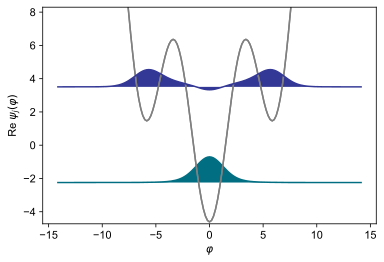

In [8]:
fluxonium.plot_wavefunction(which=[0,2])

In [6]:
data = np.abs(fluxonium.matrixelement_table('phi_operator', evals_count=2)) ** 2
print(data[0,1])
print(np.sqrt(fluxonium.EJ/fluxonium.EC)*3.49)

8.871137105850602
9.291323033673685


In [ ]:
ej

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='$\\varphi$', ylabel='Re $\\psi_j(\\varphi)$'>)

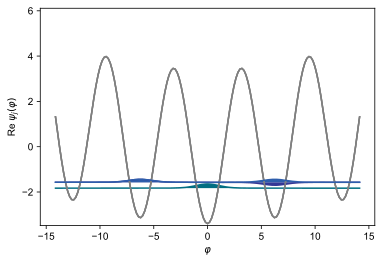

In [105]:
fluxonium.plot_wavefunction(which=[0,1,2])

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='flux', ylabel='energy [GHz]'>)

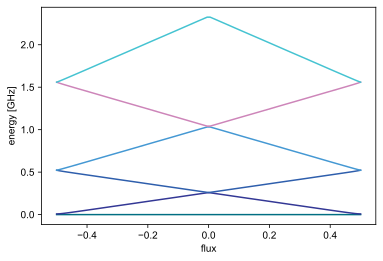

In [106]:
fluxonium.plot_evals_vs_paramvals('flux', np.linspace(-0.5,0.5,100),subtract_ground=True)

In [98]:
np.abs(fluxonium.matrixelement_table('cos_phi_operator', evals_count=2)) ** 2

array([[5.20470700e-01, 4.16179978e-32],
       [4.16179978e-32, 5.39714297e-01]])

In [96]:
1.34e-2*3

0.0402

In [97]:
0.47*8

3.76

In [8]:
fluxonium.print_noise()

 T2_current = [7.09435671]  ms 
 T2_flux = [9.42847178]  ms 
 Tphi_tot = [4.04827431]  ms 
 T1_cap = [0.18588423]  ms 
 T1_ind = [2.83256267]  ms 
 T1 = [0.17443697]  ms 
 T2 = [0.32119394]  ms


(array([0.17443697]), array([0.32119394]))

In [85]:
data = np.abs(fluxonium.matrixelement_table('phi_operator', evals_count=4)) ** 2
print(data[0,1])
data = np.abs(fluxonium.matrixelement_table('n_operator', evals_count=4)) ** 2
print(data[0,1])


8.871137105850607
0.00011641386836874068


In [76]:
flux_noise(1)

2501.9049657583237


0.006704054975514492

In [86]:
(1 - np.cos(np.pi/400)) * ((99.5/4.65) ** 2 - 1) * 2 * 2

0.05636353582529282

In [87]:
(1 - np.cos(2*np.pi/400)) * ((99.5/9.46) ** 2 - 1) * 2 * 2

0.054097989837506216

In [48]:
(1 - np.cos(np.pi/400)) / (10.53 / 99.5) ** 2 - (1 - np.cos(np.pi/400)) * 2 * 2

0.0026304594818022478

In [58]:
99.5 * np.sqrt((1. - np.cos(np.pi/400))/(0.056/4 + (1. - np.cos(np.pi/400))))

4.6650357418049335

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='flux', ylabel='energy [GHz]'>)

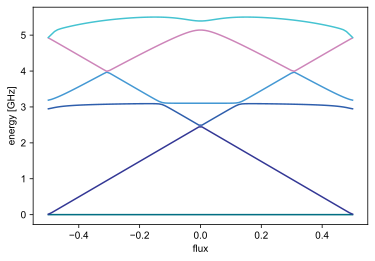

In [27]:
fluxonium.plot_evals_vs_paramvals('flux', np.linspace(-0.5,0.5,100),subtract_ground=True)

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='$\\varphi$', ylabel='Re $\\psi_j(\\varphi)$'>)

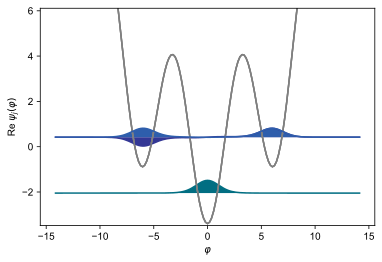

In [28]:
fluxonium.plot_wavefunction(which = (0,1,2))

In [29]:
fluxonium.eigenvals(evals_count=3)

array([-2.04784467,  0.42026841,  0.42177937])

In [62]:
def flux_noise(init_state):
    """
    common flux noise
    """
    delta = 1e-7
    pts = 11
    flux_list = np.linspace(fluxonium.flux - delta, fluxonium.flux + delta, pts)
    energy = fluxonium.get_spectrum_vs_paramvals("flux", flux_list, evals_count=init_state + 2, subtract_ground=True).energy_table[:, init_state]
    first_derivative = np.gradient(energy, flux_list)[int(np.round(pts / 2))]
    second_derivative = np.gradient(np.gradient(energy, flux_list), flux_list)[int(np.round(pts / 2))]
    print(np.abs(second_derivative))
    first_order = 2e-6 * np.abs(first_derivative)
    second_order = 4e-12 * np.abs(second_derivative)
    return np.abs(1 / (first_order + second_order) * 1e-6) / (2 * np.pi)

In [12]:
flux_noise(1)

1888.2128652810695


In [ ]:
fluxonium.

In [5]:
fluxonium = qubit.Fluxonium.create()

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x03\xe8\x00\x00\x018\x08\x02\x00\x00\x00G`N\xb5\x00\…

interactive(children=(BoundedFloatText(value=8.9, description='EJ'), BoundedFloatText(value=2.5, description='…

In [13]:
print(fluxonium)

FLUXONIUM
 ———— PARAMETERS ————
EJ	: 3.395
EC	: 0.479
EL	: 0.132
flux	: 0.5
cutoff	: 110
truncated_dim	: None
Hilbert space dimension	: 110


In [14]:
fluxonium.eigenvals()

array([-1.42548038, -1.41159883,  1.53931562,  1.79280016,  3.4982721 ,
        3.50974254])

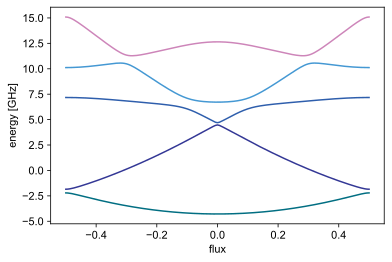

In [5]:
flux_list = np.linspace(-0.5, 0.5, 151)
fluxonium.plot_evals_vs_paramvals('flux', flux_list, evals_count=5);

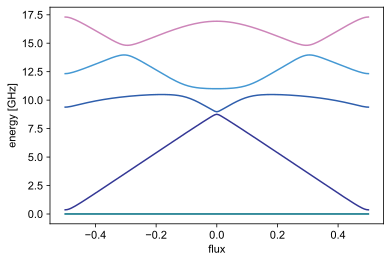

In [6]:
fluxonium.plot_evals_vs_paramvals('flux', flux_list, evals_count=5, subtract_ground=True);

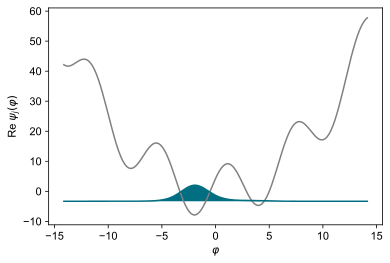

In [7]:
fluxonium.plot_wavefunction(esys=None, which=0, mode='real');

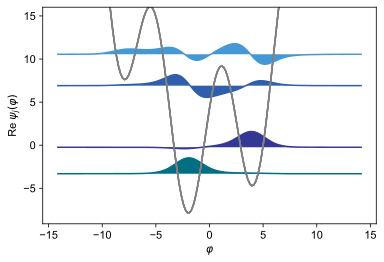

In [8]:
fluxonium.plot_wavefunction(esys=None, which=[0, 1, 2, 3], mode='real');

### Matrix elements

In [83]:
fluxonium.matrixelement_table('n_operator', evals_count=2)

array([[0.+9.86076132e-32j, 0.-1.07895259e-02j],
       [0.+1.07895259e-02j, 0.+9.24446373e-32j]])

In [4]:
np.abs(fluxonium.matrixelement_table('phi_operator', evals_count=2)) ** 2

array([[1.72794436e-32, 4.13520829e-03],
       [4.13520829e-03, 2.63053950e-24]])

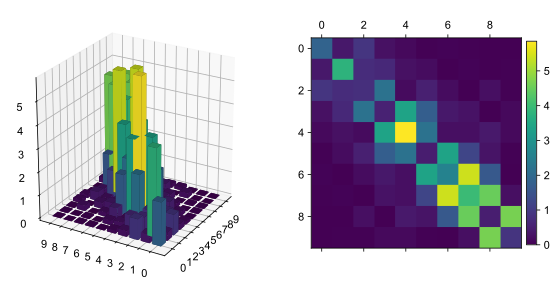

In [9]:
phimat = fluxonium.matrixelement_table('phi_operator', evals_count=10)
plot.matrix(phimat);

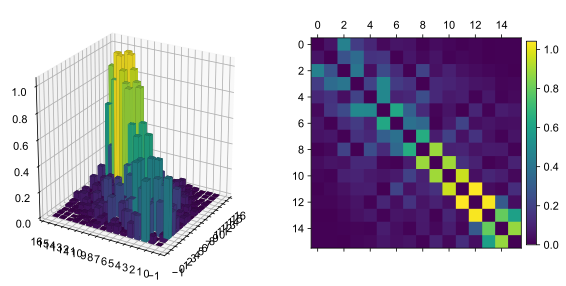

In [10]:
fluxonium.plot_matrixelements('n_operator', evals_count=16);